In [1]:
import numpy as np

# path = '/home/ornela/PYTHON/'
path = '/home/omarioni/'

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/roja_AqC.dat')
Rred_AqC = read[:,0]
red_AqC  = read[:,1]

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/azul_AqC.dat')
Rblue_AqC = read[:,0]
blue_AqC  = read[:,1]

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/roja_AqG.dat')
Rred_AqG = read[:,0]
red_AqG  = read[:,1]

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/azul_AqG.dat')
Rblue_AqG = read[:,0]
blue_AqG  = read[:,1]

### Aq-C 

In [2]:
import matplotlib.pyplot as plt

plt.plot(Rblue_AqC,blue_AqC,'.b')
plt.plot(Rred_AqC,red_AqC,'*r')

In [3]:
import scipy.interpolate as sint

finterp_red = sint.interp1d(Rred_AqC,red_AqC,fill_value="extrapolate")
finterp_blue = sint.interp1d(Rblue_AqC,blue_AqC,fill_value="extrapolate")
point = np.linspace(-15,15,300)

RED = finterp_red(point)
BLUE = finterp_blue(point)

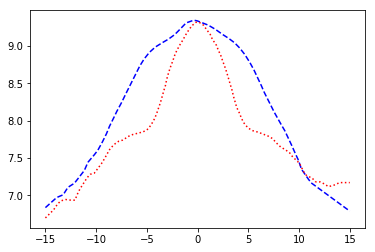

In [4]:
plt.plot(point, BLUE, '--b')
plt.plot(point, RED, ':r')

#### Diferencia lineal

3.561872909698998
('4.600e+07', 45997035.19496991)
8.217592981630562


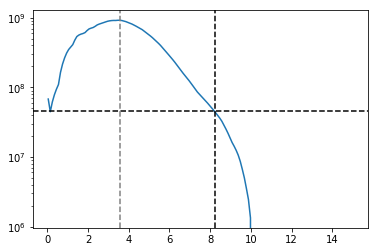

In [5]:
mask1, = np.where(point>0)

diff2 = 10**BLUE[mask1]-10**RED[mask1]
finterp = sint.interp1d(point[mask1],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff2.argmax()],15,200)
print (point[mask1][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)

plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')

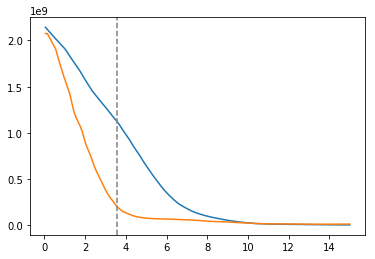

In [6]:
plt.plot(point[mask1],10**BLUE[mask1])
plt.plot(point[mask1],10**RED[mask1])
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')

##### Diferencia log

(4.665551839464882, 0.9329903691316721)
8.88243992320079
7.949449554069118


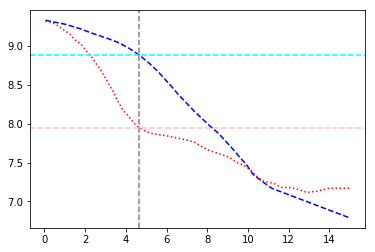

In [7]:
diff = BLUE[mask1]-RED[mask1]
print (point[mask1][diff.argmax()],diff.max())

maximo_azul = finterp_blue(point[mask1][diff.argmax()])
print(maximo_azul)
maximo_rojo = finterp_red(point[mask1][diff.argmax()])
print(maximo_rojo)

plt.plot(point[mask1], BLUE[mask1], '--b')
plt.plot(point[mask1], RED[mask1], ':r')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_rojo, ls='--',color='pink' )
plt.axhline(y=maximo_azul, ls='--',color='cyan' )


('3.369e+07', 7.527526246288013)
4.665551839464882
8.560444362279625


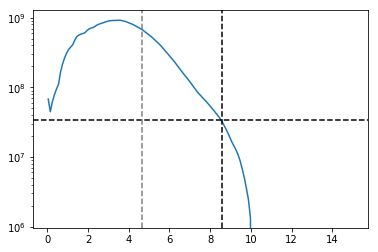

In [8]:
diferencia = 10**maximo_azul - 10**maximo_rojo
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask1][diff.argmax()],15,200)
print (point[mask1][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Del otro lado

-4.866220735785953


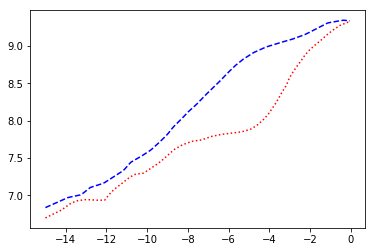

In [9]:
mask2, = np.where(point<0)
diff = BLUE[mask2]-RED[mask2]

plt.plot(point[mask2], BLUE[mask2], '--b')
plt.plot(point[mask2], RED[mask2], ':r')

print(point[mask2][diff.argmax()])

-3.5618729096989963
('4.462e+07', 44616291.81065807)
-8.677417186265778


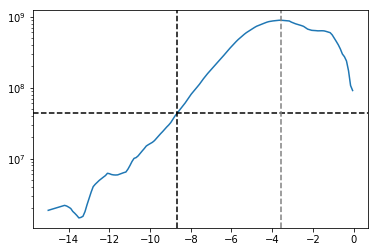

In [10]:
diff2 = 10**BLUE[mask2]-10**RED[mask2]
finterp = sint.interp1d(point[mask2],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask2][diff2.argmax()],-15,200)
print (point[mask2][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')


##### Diferencia log

(-4.866220735785953, 1.0031412578966918)
8.894904310665178
7.891763052768486


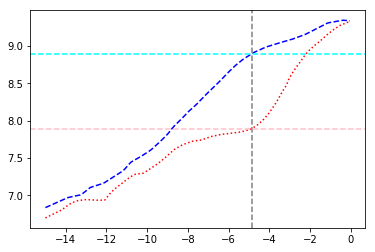

In [11]:
diff = BLUE[mask2]-RED[mask2]
print (point[mask2][diff.argmax()],diff.max())

maximo_azul = finterp_blue(point[mask2][diff.argmax()])
print(maximo_azul)
maximo_rojo = finterp_red(point[mask2][diff.argmax()])
print(maximo_rojo)

plt.plot(point[mask2], BLUE[mask2], '--b')
plt.plot(point[mask2], RED[mask2], ':r')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_rojo, ls='--',color='pink' )
plt.axhline(y=maximo_azul, ls='--',color='cyan' )


('3.536e+07', 7.548464454701885)
-4.866220735785953
-8.94010184702778


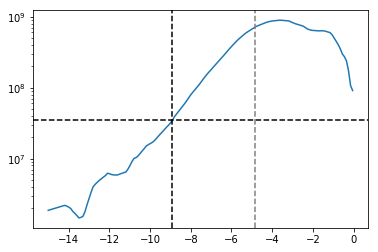

In [12]:
diferencia = 10**maximo_azul - 10**maximo_rojo
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask2][diff.argmax()],-15,200)
print (point[mask2][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

### Aq-G

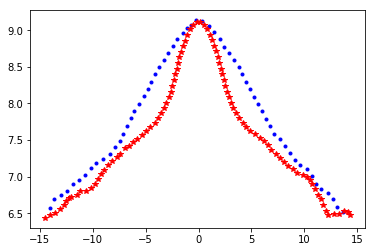

In [13]:
import matplotlib.pyplot as plt

plt.plot(Rblue_AqG,blue_AqG,'.b')
plt.plot(Rred_AqG,red_AqG,'*r')

In [14]:
import scipy.interpolate as sint

finterp_red = sint.interp1d(Rred_AqG,red_AqG,fill_value="extrapolate")
finterp_blue = sint.interp1d(Rblue_AqG,blue_AqG,fill_value="extrapolate")
point = np.linspace(-15,15,300)

RED = finterp_red(point)
BLUE = finterp_blue(point)

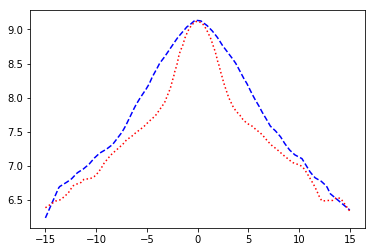

In [15]:
plt.plot(point, BLUE, '--b')
plt.plot(point, RED, ':r')

#### Diferencia lineal

1.9565217391304337
('2.065e+07', 20651128.270209298)
7.003495739567402


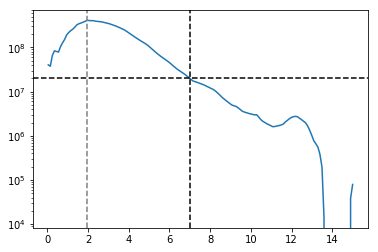

In [16]:
mask1, = np.where(point>0)

diff2 = 10**BLUE[mask1]-10**RED[mask1]
finterp = sint.interp1d(point[mask1],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff2.argmax()],15,200)
print (point[mask1][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Diferencia log

(3.7625418060200673, 0.6948113371285753)
8.501982956123305
7.80717161899473


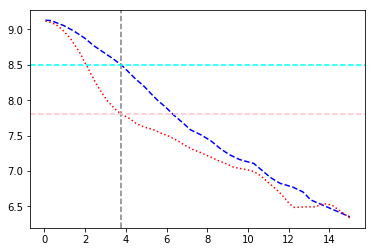

In [17]:
diff = BLUE[mask1]-RED[mask1]
print (point[mask1][diff.argmax()],diff.max())

maximo_azul = finterp_blue(point[mask1][diff.argmax()])
print(maximo_azul)
maximo_rojo = finterp_red(point[mask1][diff.argmax()])
print(maximo_rojo)

plt.plot(point[mask1], BLUE[mask1], '--b')
plt.plot(point[mask1], RED[mask1], ':r')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_rojo, ls='--',color='pink' )
plt.axhline(y=maximo_azul, ls='--',color='cyan' )


('1.268e+07', 7.102997028519942)
3.7625418060200673
7.941295104283962


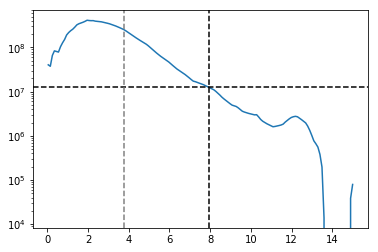

In [18]:
diferencia = 10**maximo_azul - 10**maximo_rojo
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask1][diff.argmax()],15,200)
print (point[mask1][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Del otro lado

-3.662207357859531


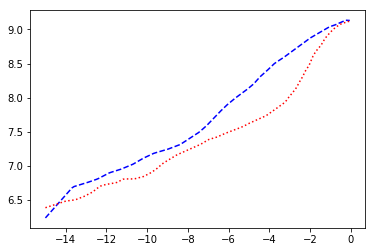

In [19]:
mask2, = np.where(point<0)
diff = BLUE[mask2]-RED[mask2]

plt.plot(point[mask2], BLUE[mask2], '--b')
plt.plot(point[mask2], RED[mask2], ':r')

print(point[mask2][diff.argmax()])

-2.05685618729097
('2.161e+07', 21607312.566726528)
-6.869884539755635


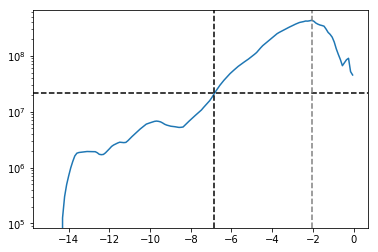

In [20]:
diff2 = 10**BLUE[mask2]-10**RED[mask2]
finterp = sint.interp1d(point[mask2],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask2][diff2.argmax()],-15,200)
print (point[mask2][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')


##### Diferencia log

(-3.662207357859531, 0.6789057437748749)
8.51857990835879
7.839674164583915


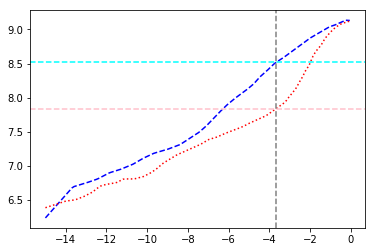

In [21]:
diff = BLUE[mask2]-RED[mask2]
print (point[mask2][diff.argmax()],diff.max())

maximo_azul = finterp_blue(point[mask2][diff.argmax()])
print(maximo_azul)
maximo_rojo = finterp_red(point[mask2][diff.argmax()])
print(maximo_rojo)

plt.plot(point[mask2], BLUE[mask2], '--b')
plt.plot(point[mask2], RED[mask2], ':r')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_rojo, ls='--',color='pink' )
plt.axhline(y=maximo_azul, ls='--',color='cyan' )


('1.305e+07', 7.1154755751756)
-3.662207357859531
-7.308532629703702


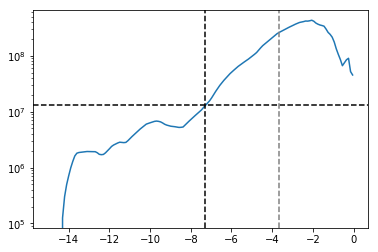

In [22]:
diferencia = 10**maximo_azul - 10**maximo_rojo
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask2][diff.argmax()],-15,200)
print (point[mask2][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

### Para A-Gadget2

In [1]:
import numpy as np
# path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/correcciones/surfden_profiles/'
path = '/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/correcciones/surfden_profiles/'

M31GD = np.loadtxt(path + 'M31GD_xysurfden_profile.dat')
medx_M31GD = M31GD[:,0]
medy_M31GD = M31GD[:,1]
sigx_M31GD = M31GD[:,2]
sigy_M31GD = M31GD[:,3]

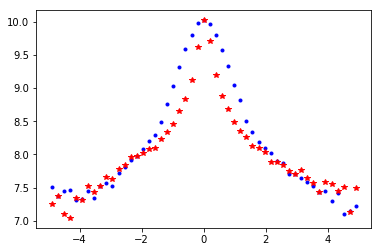

In [3]:
import matplotlib.pyplot as plt

plt.plot(medx_M31GD,np.log10(sigx_M31GD),'.b')
plt.plot(medy_M31GD,np.log10(sigy_M31GD),'*r')

In [4]:
import scipy.interpolate as sint

finterp_x = sint.interp1d(medx_M31GD,np.log10(sigx_M31GD),fill_value="extrapolate")
finterp_y = sint.interp1d(medy_M31GD,np.log10(sigy_M31GD),fill_value="extrapolate")
point = np.linspace(-5,5,300)

SX = finterp_x(point)
SY = finterp_y(point)

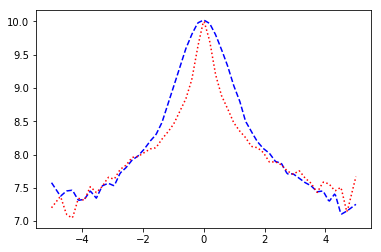

In [5]:
plt.plot(point, SX, '--b')
plt.plot(point, SY, ':r')

#### Diferencia lineal

0.31772575250836077
('2.424e+08', 242433130.8902079)
1.282415421589553


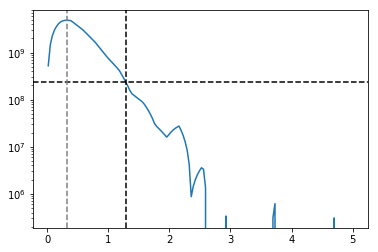

In [6]:
mask1, = np.where(point>0)

diff2 = 10**SX[mask1]-10**SY[mask1]
finterp = sint.interp1d(point[mask1],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff2.argmax()],5,200)
print (point[mask1][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Diferencia log

(0.5852842809364542, 0.6931481490824485)
9.577565190103307
8.884417041020859


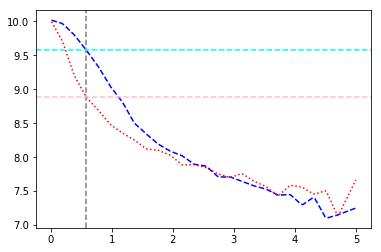

In [7]:
diff = SX[mask1]-SY[mask1]
print (point[mask1][diff.argmax()],diff.max())

maximo_x = finterp_x(point[mask1][diff.argmax()])
print(maximo_x)
maximo_y = finterp_y(point[mask1][diff.argmax()])
print(maximo_y)

plt.plot(point[mask1], SX[mask1], '--b')
plt.plot(point[mask1], SY[mask1], ':r')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_y, ls='--',color='pink' )
plt.axhline(y=maximo_x, ls='--',color='cyan' )


('1.507e+08', 8.178157441008578)
0.5852842809364542
1.3617418194652187


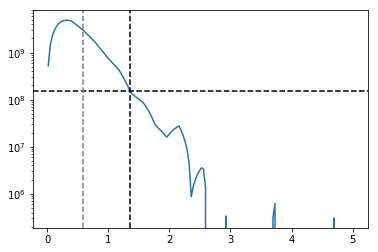

In [8]:
diferencia = 10**maximo_x - 10**maximo_y
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask1][diff.argmax()],5,200)
print (point[mask1][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Del otro lado

-0.5852842809364551


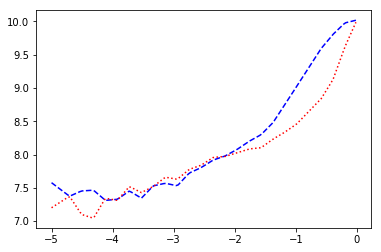

In [9]:
mask2, = np.where(point<0)
diff = SX[mask2]-SY[mask2]

plt.plot(point[mask2], SX[mask2], '--b')
plt.plot(point[mask2], SY[mask2], ':r')

print(point[mask2][diff.argmax()])

-0.2508361204013383
('2.740e+08', 274025803.85399956)
-1.2531722155930156


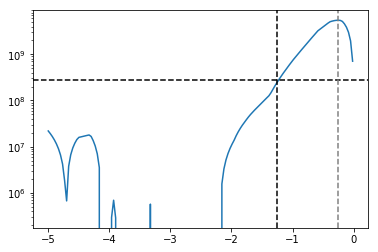

In [10]:
diff2 = 10**SX[mask2]-10**SY[mask2]
finterp = sint.interp1d(point[mask2],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask2][diff2.argmax()],-5,200)
print (point[mask2][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')


##### Diferencia log

(-0.5852842809364551, 0.7544694182476857)
9.593939754501154
8.839470336253468


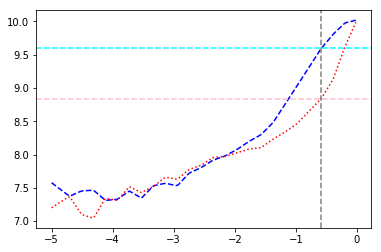

In [11]:
diff = SX[mask2]-SY[mask2]
print (point[mask2][diff.argmax()],diff.max())

maximo_x = finterp_x(point[mask2][diff.argmax()])
print(maximo_x)
maximo_y = finterp_y(point[mask2][diff.argmax()])
print(maximo_y)

plt.plot(point[mask2], SX[mask2], '--b')
plt.plot(point[mask2], SY[mask2], ':r')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_y, ls='--',color='pink' )
plt.axhline(y=maximo_x, ls='--',color='cyan' )


('1.617e+08', 8.208833144160463)
-0.5852842809364551
-1.3395573183643974


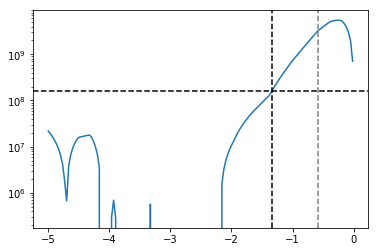

In [12]:
diferencia = 10**maximo_x - 10**maximo_y
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask2][diff.argmax()],-5,200)
print (point[mask2][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

### Para A-Gasoline

In [1]:
import numpy as np
# path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/correcciones/surfden_profiles/'
path = '/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/correcciones/surfden_profiles/'

M31GS = np.loadtxt(path + 'M31GS_xysurfden_profile.dat')
medx_M31GS = M31GS[:,0]
medy_M31GS = M31GS[:,1]
sigx_M31GS = M31GS[:,2]
sigy_M31GS = M31GS[:,3]

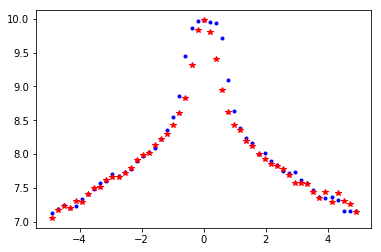

In [3]:
import matplotlib.pyplot as plt

plt.plot(medx_M31GS,np.log10(sigx_M31GS),'.b')
plt.plot(medy_M31GS,np.log10(sigy_M31GS),'*r')

In [4]:
import scipy.interpolate as sint

finterp_x = sint.interp1d(medx_M31GS,np.log10(sigx_M31GS),fill_value="extrapolate")
finterp_y = sint.interp1d(medy_M31GS,np.log10(sigy_M31GS),fill_value="extrapolate")
point = np.linspace(-5,5,300)

SX = finterp_x(point)
SY = finterp_y(point)

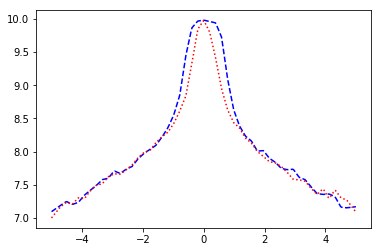

In [5]:
plt.plot(point, SX, '--b')
plt.plot(point, SY, ':r')

#### Diferencia lineal

0.38461538461538414
('3.026e+08', 302612746.4047305)
0.918051797448782


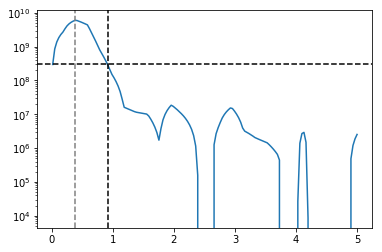

In [6]:
mask1, = np.where(point>0)

diff2 = 10**SX[mask1]-10**SY[mask1]
finterp = sint.interp1d(point[mask1],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff2.argmax()],5,200)
print (point[mask1][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Diferencia log

(0.5852842809364542, 0.7755570261852576)
9.724208221250755
8.948651195065498


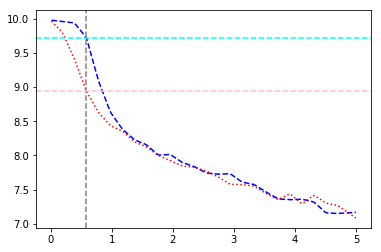

In [7]:
diff = SX[mask1]-SY[mask1]
print (point[mask1][diff.argmax()],diff.max())

maximo_x = finterp_x(point[mask1][diff.argmax()])
print(maximo_x)
maximo_y = finterp_y(point[mask1][diff.argmax()])
print(maximo_y)

plt.plot(point[mask1], SX[mask1], '--b')
plt.plot(point[mask1], SY[mask1], ':r')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_y, ls='--',color='pink' )
plt.axhline(y=maximo_x, ls='--',color='cyan' )


('2.205e+08', 8.343476269934722)
0.5852842809364542
0.9624207996504255


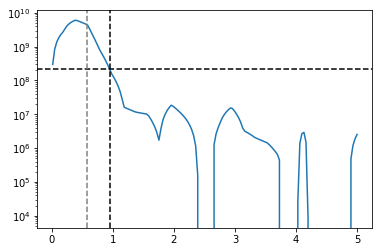

In [8]:
diferencia = 10**maximo_x - 10**maximo_y
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask1][diff.argmax()],5,200)
print (point[mask1][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Del otro lado

-0.5852842809364551


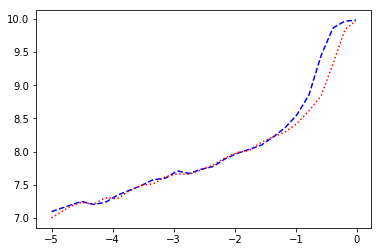

In [9]:
mask2, = np.where(point<0)
diff = SX[mask2]-SY[mask2]

plt.plot(point[mask2], SX[mask2], '--b')
plt.plot(point[mask2], SY[mask2], ':r')

print(point[mask2][diff.argmax()])

-0.384615384615385
('2.584e+08', 258374530.18003613)
-0.8252802473908005


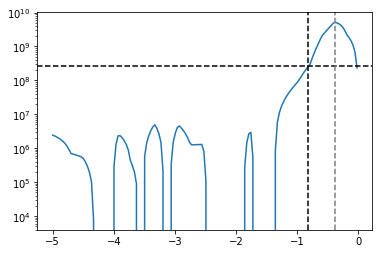

In [10]:
diff2 = 10**SX[mask2]-10**SY[mask2]
finterp = sint.interp1d(point[mask2],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask2][diff2.argmax()],-5,200)
print (point[mask2][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')


##### Diferencia log

(-0.5852842809364551, 0.6067483111645497)
9.45059715070155
8.843848839537


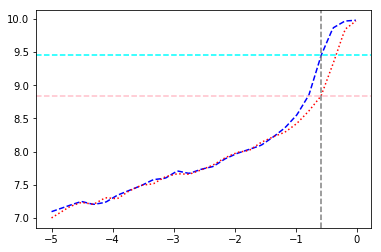

In [11]:
diff = SX[mask2]-SY[mask2]
print (point[mask2][diff.argmax()],diff.max())

maximo_x = finterp_x(point[mask2][diff.argmax()])
print(maximo_x)
maximo_y = finterp_y(point[mask2][diff.argmax()])
print(maximo_y)

plt.plot(point[mask2], SX[mask2], '--b')
plt.plot(point[mask2], SY[mask2], ':r')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_y, ls='--',color='pink' )
plt.axhline(y=maximo_x, ls='--',color='cyan' )


('1.062e+08', 8.026180011738195)
-0.5852842809364551
-0.9846053007512481


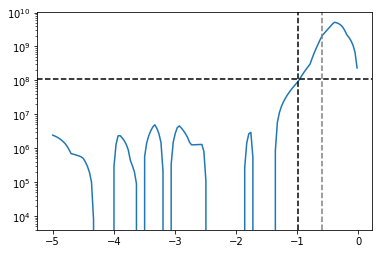

In [12]:
diferencia = 10**maximo_x - 10**maximo_y
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask2][diff.argmax()],-5,200)
print (point[mask2][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

### Para B-Gasoline

In [1]:
import numpy as np
# path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/correcciones/surfden_profiles/'
path = '/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/correcciones/surfden_profiles/'

MWGS = np.loadtxt(path + 'MWGS_xysurfden_profile.dat')
medx_MWGS = MWGS[:,0]
medy_MWGS = MWGS[:,1]
sigx_MWGS = MWGS[:,2]
sigy_MWGS = MWGS[:,3]

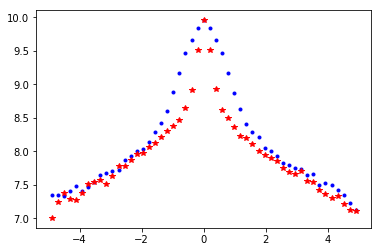

In [3]:
import matplotlib.pyplot as plt

plt.plot(medx_MWGS,np.log10(sigx_MWGS),'.b')
plt.plot(medy_MWGS,np.log10(sigy_MWGS),'*r')

In [4]:
import scipy.interpolate as sint

finterp_x = sint.interp1d(medx_MWGS,np.log10(sigx_MWGS),fill_value="extrapolate")
finterp_y = sint.interp1d(medy_MWGS,np.log10(sigy_MWGS),fill_value="extrapolate")
point = np.linspace(-5,5,300)

SX = finterp_x(point)
SY = finterp_y(point)

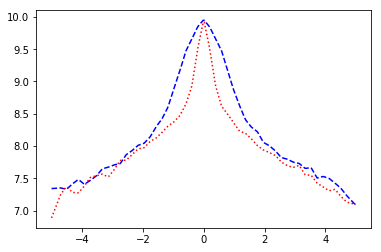

In [5]:
plt.plot(point, SX, '--b')
plt.plot(point, SY, ':r')

#### Diferencia lineal

0.28428093645484953
('1.989e+08', 198851616.1390028)
1.2558612460294785


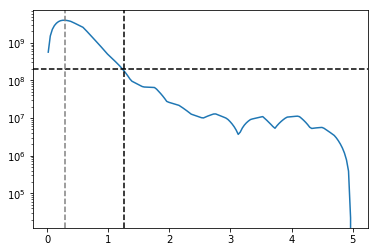

In [6]:
mask1, = np.where(point>0)

diff2 = 10**SX[mask1]-10**SY[mask1]
finterp = sint.interp1d(point[mask1],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff2.argmax()],5,200)
print (point[mask1][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Diferencia log

(0.5852842809364542, 0.8568463439455805)
9.476658177720209
8.619811833774628


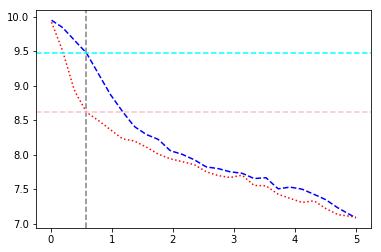

In [7]:
diff = SX[mask1]-SY[mask1]
print (point[mask1][diff.argmax()],diff.max())

maximo_x = finterp_x(point[mask1][diff.argmax()])
print(maximo_x)
maximo_y = finterp_y(point[mask1][diff.argmax()])
print(maximo_y)

plt.plot(point[mask1], SX[mask1], '--b')
plt.plot(point[mask1], SY[mask1], ':r')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_y, ls='--',color='pink' )
plt.axhline(y=maximo_x, ls='--',color='cyan' )


('1.290e+08', 8.110608912440894)
0.5852842809364542
1.3395573183643967


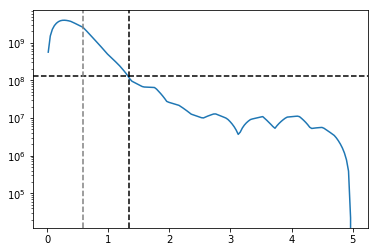

In [8]:
diferencia = 10**maximo_x - 10**maximo_y
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask1][diff.argmax()],5,200)
print (point[mask1][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

#### Del otro lado

-0.5852842809364551


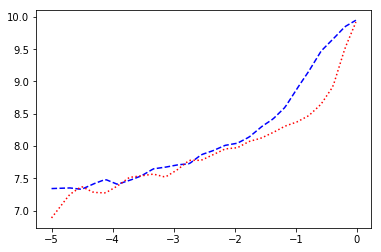

In [9]:
mask2, = np.where(point<0)
diff = SX[mask2]-SY[mask2]

plt.plot(point[mask2], SX[mask2], '--b')
plt.plot(point[mask2], SY[mask2], ':r')

print(point[mask2][diff.argmax()])

-0.28428093645484953
('2.004e+08', 200448030.33522055)
-1.1847700038654811


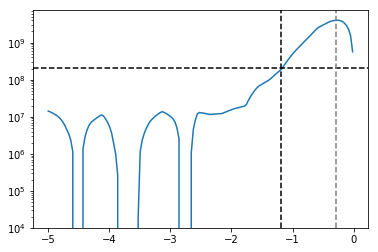

In [10]:
diff2 = 10**SX[mask2]-10**SY[mask2]
finterp = sint.interp1d(point[mask2],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask2][diff2.argmax()],-5,200)
print (point[mask2][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')


##### Diferencia log

(-0.5852842809364551, 0.8211461819561912)
9.47180865624115
8.650662474284958


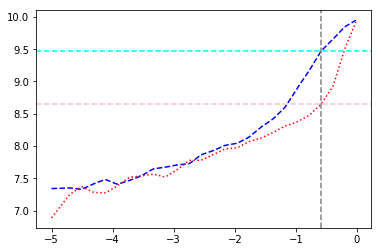

In [11]:
diff = SX[mask2]-SY[mask2]
print (point[mask2][diff.argmax()],diff.max())

maximo_x = finterp_x(point[mask2][diff.argmax()])
print(maximo_x)
maximo_y = finterp_y(point[mask2][diff.argmax()])
print(maximo_y)

plt.plot(point[mask2], SX[mask2], '--b')
plt.plot(point[mask2], SY[mask2], ':r')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray' )
plt.axhline(y=maximo_y, ls='--',color='pink' )
plt.axhline(y=maximo_x, ls='--',color='cyan' )


('1.258e+08', 8.099708246477956)
-0.5852842809364551
-1.3173728172635757


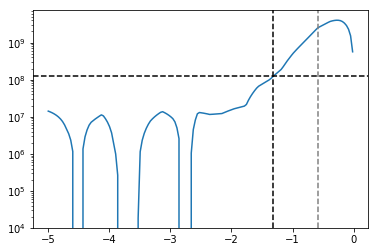

In [12]:
diferencia = 10**maximo_x - 10**maximo_y
corte = diferencia*0.05
print(str('%1.3e'%corte), np.log10(corte))

point2 = np.linspace(point[mask2][diff.argmax()],-5,200)
print (point[mask2][diff.argmax()])

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)


plt.plot(point[mask2],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask2][diff.argmax()], ls='--',color='gray')
plt.yscale('log')

In [13]:
import pandas as pd
df = pd.DataFrame({'A': [0, 1, 2, 3, 4]})

In [14]:
df

,A
0,0
1,1
2,2
3,3
4,4


In [1]:
import numpy as np

# path = '/home/ornela/PYTHON/'
path = '/home/omarioni/'

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/roja_AqC.dat')
Rred_AqC = read[:,0]
red_AqC  = read[:,1]

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/azul_AqC.dat')
Rblue_AqC = read[:,0]
blue_AqC  = read[:,1]

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/roja_AqG.dat')
Rred_AqG = read[:,0]
red_AqG  = read[:,1]

read  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/datos/scannapieco/azul_AqG.dat')
Rblue_AqG = read[:,0]
blue_AqG  = read[:,1]

### Aq-C 

In [2]:
import matplotlib.pyplot as plt

plt.plot(Rblue_AqC,blue_AqC,'.b')
plt.plot(Rred_AqC,red_AqC,'*r')

In [9]:
import scipy.interpolate as sint

finterp_red = sint.interp1d(Rred_AqC,red_AqC,fill_value="extrapolate")
finterp_blue = sint.interp1d(Rblue_AqC,blue_AqC,fill_value="extrapolate")
point = np.linspace(-15,15,301)

RED = finterp_red(point)
BLUE = finterp_blue(point)

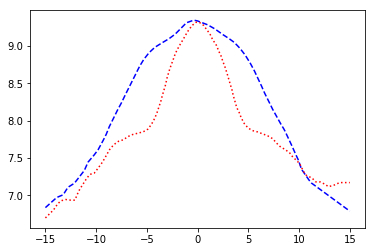

In [10]:
plt.plot(point, BLUE, '--b')
plt.plot(point, RED, ':r')

3.6000000000000014
('4.529e+07', 45293702.72224077)
8.469346733668342


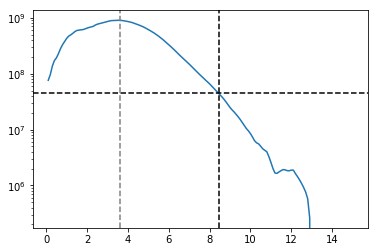

In [28]:
mask1, = np.where(point>0)
mask2, = np.where(point<0)
PROM_BLUE = (BLUE[mask1] + BLUE[mask2][::-1]) / 2
PROM_RED = (RED[mask1] + RED[mask2][::-1]) / 2
diff3 = 10**PROM_BLUE-10**PROM_RED

finterp = sint.interp1d(point[mask1],diff3,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff3.argmax()],15,200)
print (point[mask1][diff3.argmax()])
corte = diff3.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)

plt.plot(point[mask1],diff3)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')
plt.yscale('log')

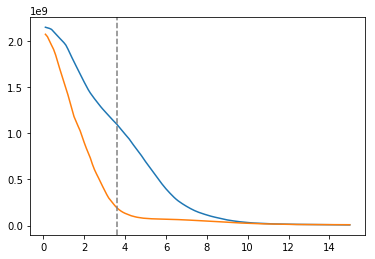

In [29]:
plt.plot(point[mask1],10**PROM_BLUE)
plt.plot(point[mask1],10**PROM_RED)
plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')

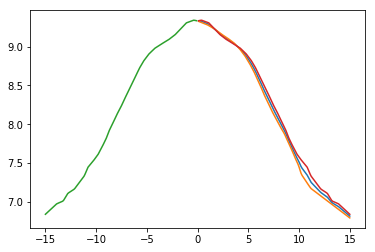

In [30]:
plt.plot(point[mask1],PROM_BLUE)
plt.plot(point[mask1],BLUE[mask1])
plt.plot(point[mask2],BLUE[mask2])
plt.plot(-point[mask2],BLUE[mask2])
# plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')

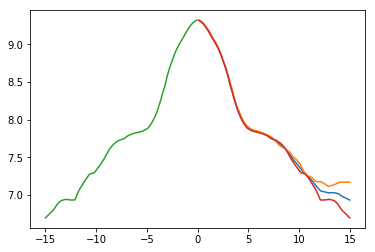

In [31]:
plt.plot(point[mask1],PROM_RED)
plt.plot(point[mask1],RED[mask1])
plt.plot(point[mask2],RED[mask2])
plt.plot(-point[mask2],RED[mask2])
# plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')

#### Diferencia lineal

3.561872909698998
('4.600e+07', 45997035.19496991)
8.217592981630562


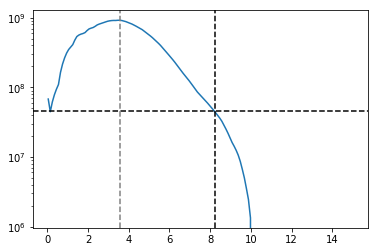

In [5]:
mask1, = np.where(point>0)

diff2 = 10**BLUE[mask1]-10**RED[mask1]
finterp = sint.interp1d(point[mask1],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff2.argmax()],15,200)
print (point[mask1][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)

plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')

### Aq-G

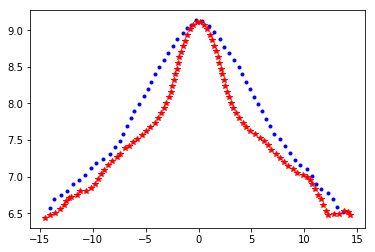

In [32]:
import matplotlib.pyplot as plt

plt.plot(Rblue_AqG,blue_AqG,'.b')
plt.plot(Rred_AqG,red_AqG,'*r')

In [34]:
import scipy.interpolate as sint

finterp_red = sint.interp1d(Rred_AqG,red_AqG,fill_value="extrapolate")
finterp_blue = sint.interp1d(Rblue_AqG,blue_AqG,fill_value="extrapolate")
point = np.linspace(-15,15,301)

RED = finterp_red(point)
BLUE = finterp_blue(point)

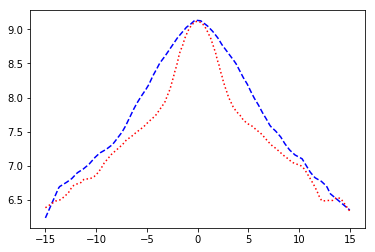

In [35]:
plt.plot(point, BLUE, '--b')
plt.plot(point, RED, ':r')

2.0
('2.096e+07', 20958286.984069537)
6.899497487437186


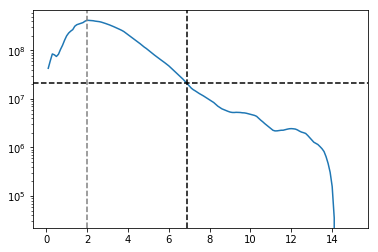

In [36]:
mask1, = np.where(point>0)
mask2, = np.where(point<0)
PROM_BLUE = (BLUE[mask1] + BLUE[mask2][::-1]) / 2
PROM_RED = (RED[mask1] + RED[mask2][::-1]) / 2
diff3 = 10**PROM_BLUE-10**PROM_RED

finterp = sint.interp1d(point[mask1],diff3,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff3.argmax()],15,200)
print (point[mask1][diff3.argmax()])
corte = diff3.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)

plt.plot(point[mask1],diff3)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')
plt.yscale('log')

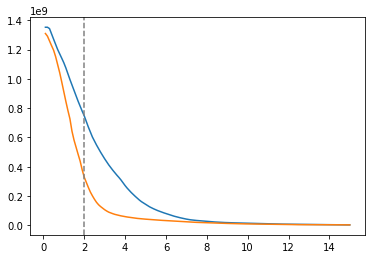

In [37]:
plt.plot(point[mask1],10**PROM_BLUE)
plt.plot(point[mask1],10**PROM_RED)
plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')

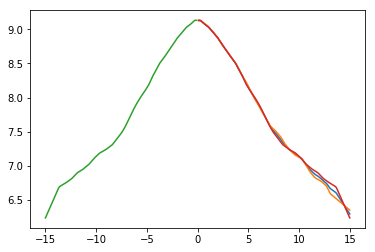

In [38]:
plt.plot(point[mask1],PROM_BLUE)
plt.plot(point[mask1],BLUE[mask1])
plt.plot(point[mask2],BLUE[mask2])
plt.plot(-point[mask2],BLUE[mask2])
# plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')

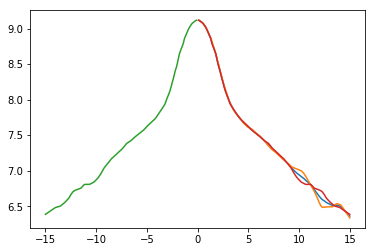

In [39]:
plt.plot(point[mask1],PROM_RED)
plt.plot(point[mask1],RED[mask1])
plt.plot(point[mask2],RED[mask2])
plt.plot(-point[mask2],RED[mask2])
# plt.axvline(x=point[mask1][diff3.argmax()], ls='--',color='gray')

2.0
('2.064e+07', 20642498.397494476)
7.030150753768845


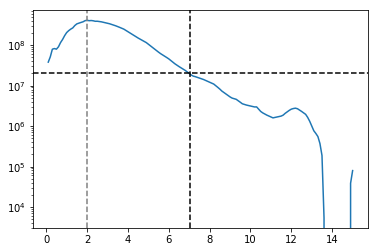

In [40]:
mask1, = np.where(point>0)

diff2 = 10**BLUE[mask1]-10**RED[mask1]
finterp = sint.interp1d(point[mask1],diff2,fill_value="extrapolate")
point2 = np.linspace(point[mask1][diff2.argmax()],15,200)
print (point[mask1][diff2.argmax()])
corte = diff2.max()*0.05
print(str('%1.3e'%corte), corte)

resta = finterp(point2) - corte
mask, = np.where(resta < 0.)
lbar = point2[mask][0]
print (lbar)

plt.plot(point[mask1],diff2)
plt.axhline(y=corte,ls='--',color='k')
plt.axvline(x=lbar, ls='--',color='k')
plt.axvline(x=point[mask1][diff2.argmax()], ls='--',color='gray')
plt.yscale('log')